In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result


def k_folds(df, y, k=5):
    combined = pd.concat([df, y], axis=1)
    folds = []
    fold_size = len(combined) // k
    for i in range(k):
        if i < k - 1:
            fold = combined[i * fold_size:(i + 1) * fold_size]
        else:
            fold = combined[i * fold_size:]
        folds.append(fold)
    return folds


class LinearRegressionCustom:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ self.weights


def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


def r2_score(y_true, y_pred):
    correlation_matrix = np.corrcoef(y_true, y_pred)
    correlation_xy = correlation_matrix[0, 1]
    return correlation_xy ** 2

In [3]:
df = pd.read_csv("winequality-white.csv", sep=";")
df = df.drop(columns=['quality'])
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)
train_df = normalize(train_df)
test_df = normalize(test_df)

y_train = train_df.pop('alcohol')
y_test = test_df.pop('alcohol')


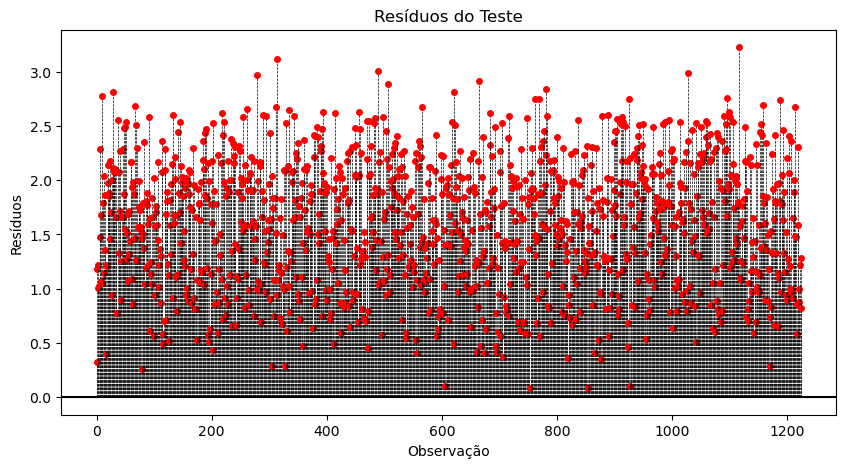

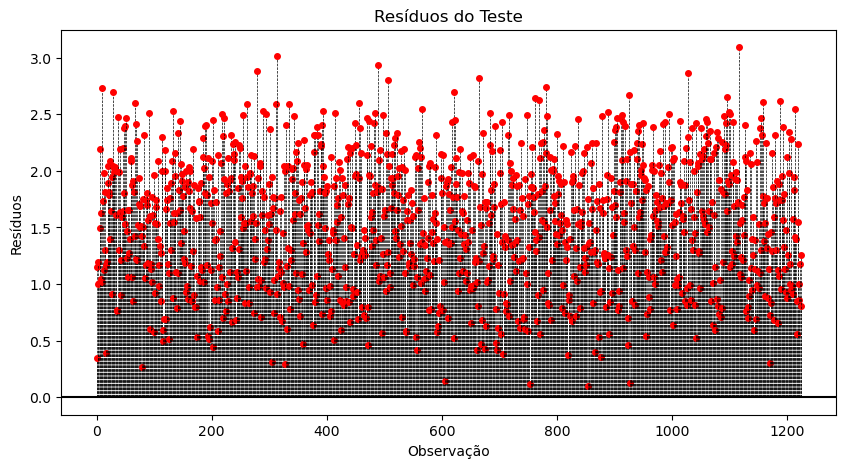

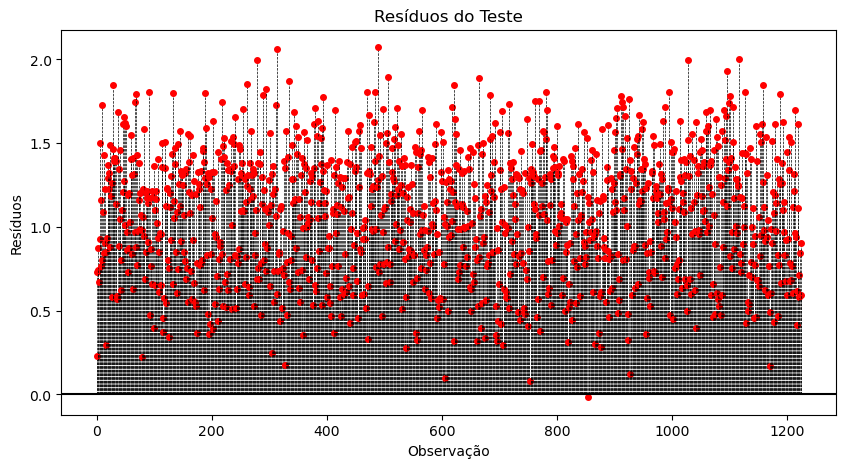

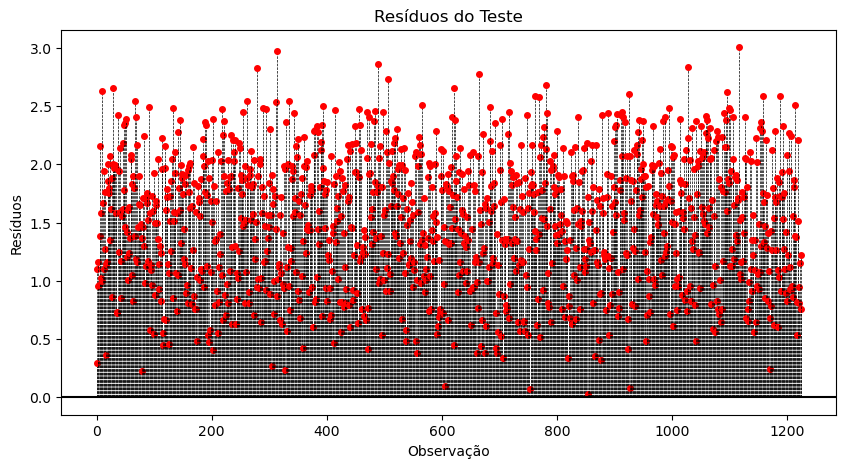

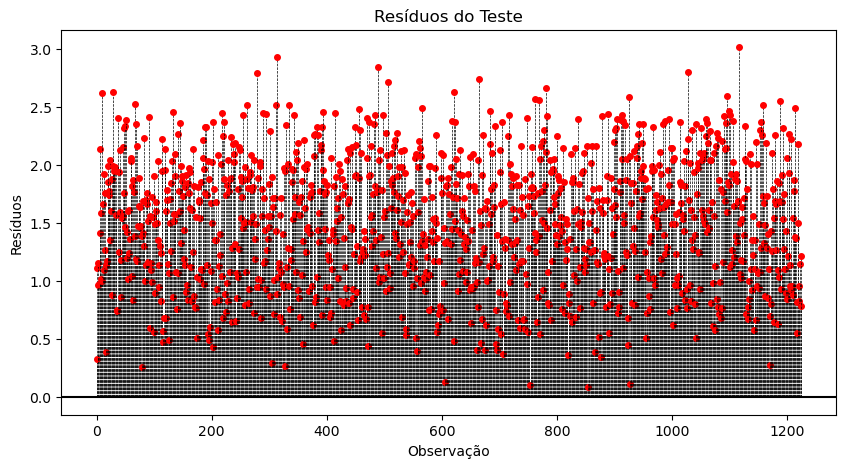

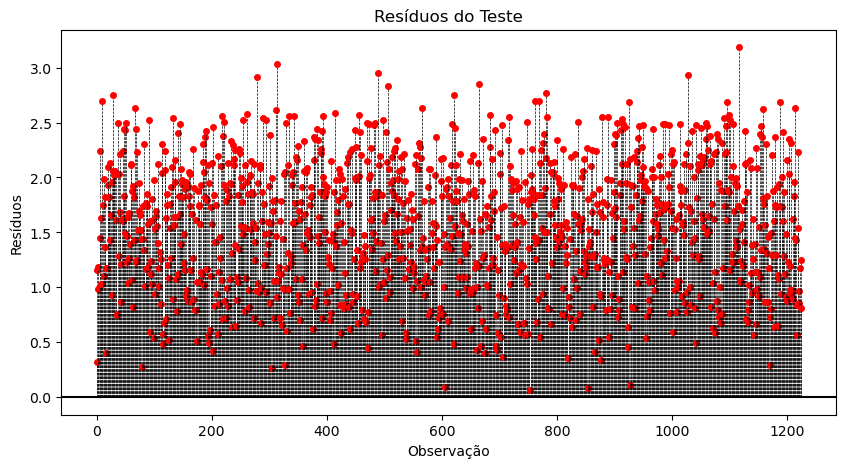

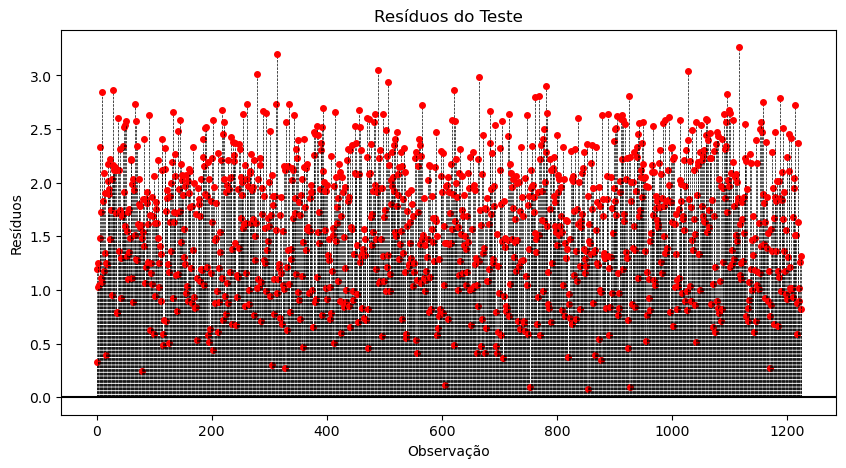

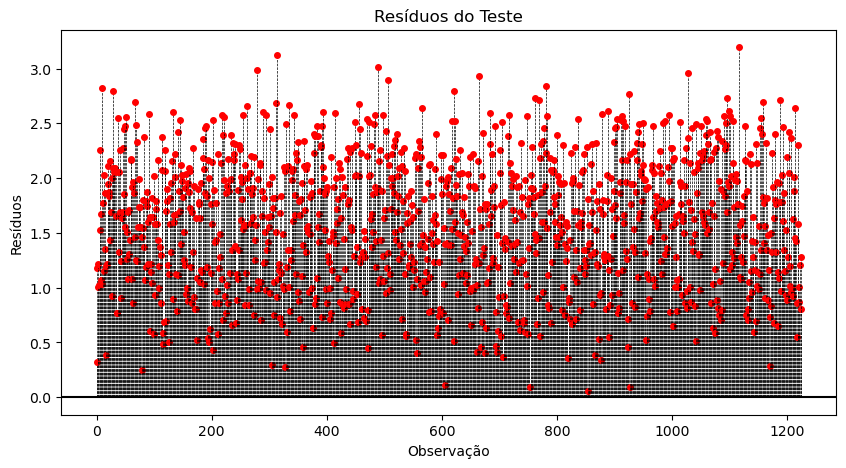

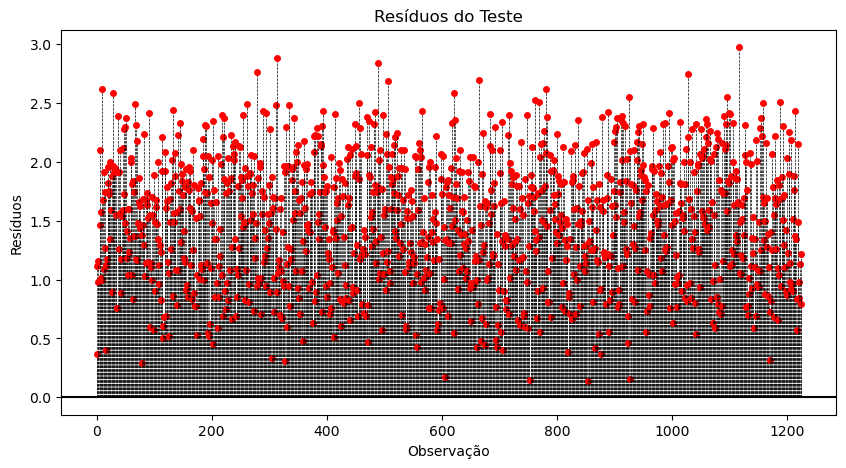

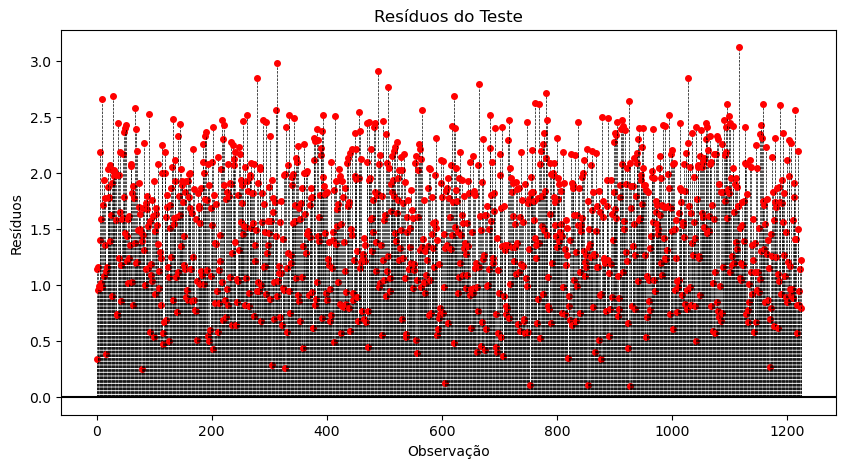

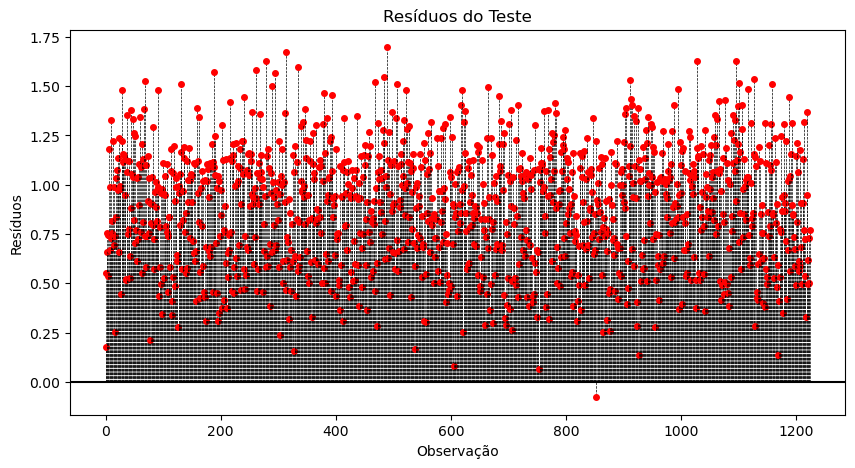

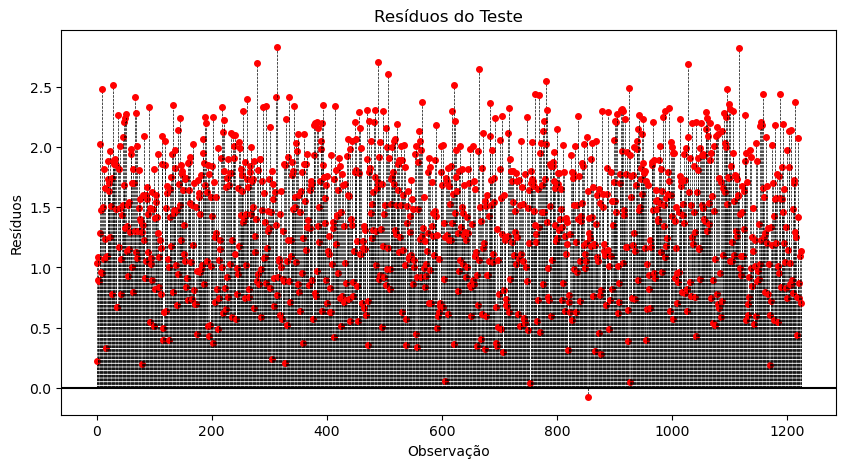

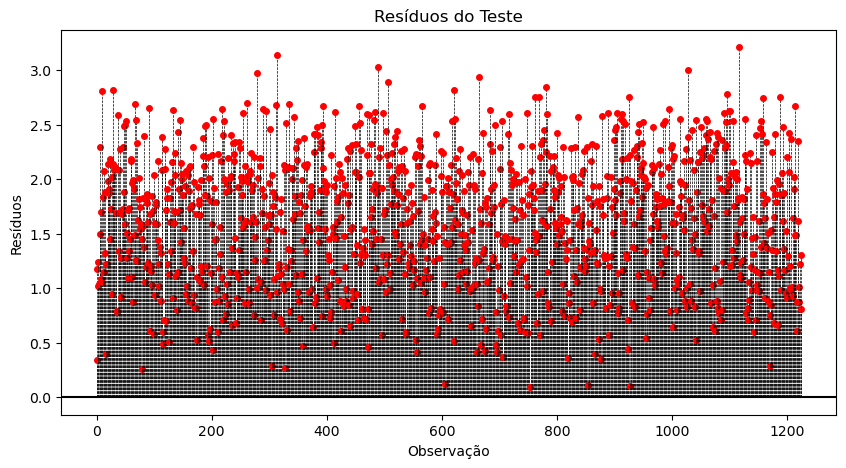

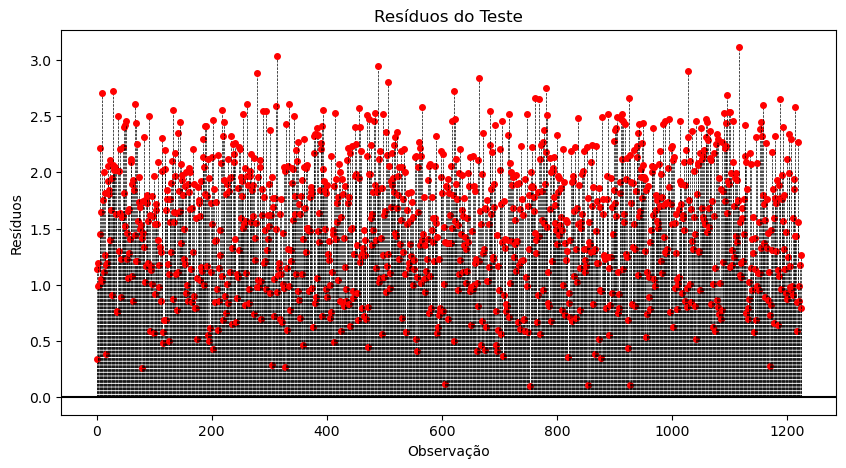

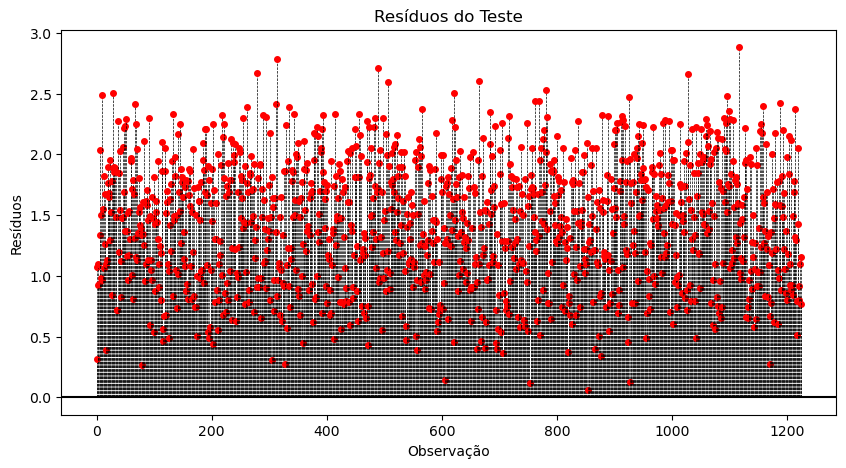

In [8]:
def cross_validate_and_plot_residuals(k):
    folds = k_folds(train_df, y_train, k)
    rmses = []
    r2s = []
    
    for i, fold in enumerate(folds):
        train = fold.dropna()
        X_train_fold = train.drop(columns=['alcohol'])
        y_train_fold = train['alcohol']

        model = LinearRegressionCustom()
        model.fit(X_train_fold, y_train_fold)

        predictions = model.predict(test_df)
        
        # Plotar os resíduos para cada fold
        plot_residuals(y_test, predictions)

        rmses.append(rmse(predictions, y_test))
        r2s.append(r2_score(y_test, predictions))

    return rmses, r2s

# Chamar a função modificada
rmses_5, r2s_5 = cross_validate_and_plot_residuals(5)
rmses_5, r2s_5 = cross_validate_and_plot_residuals(10)

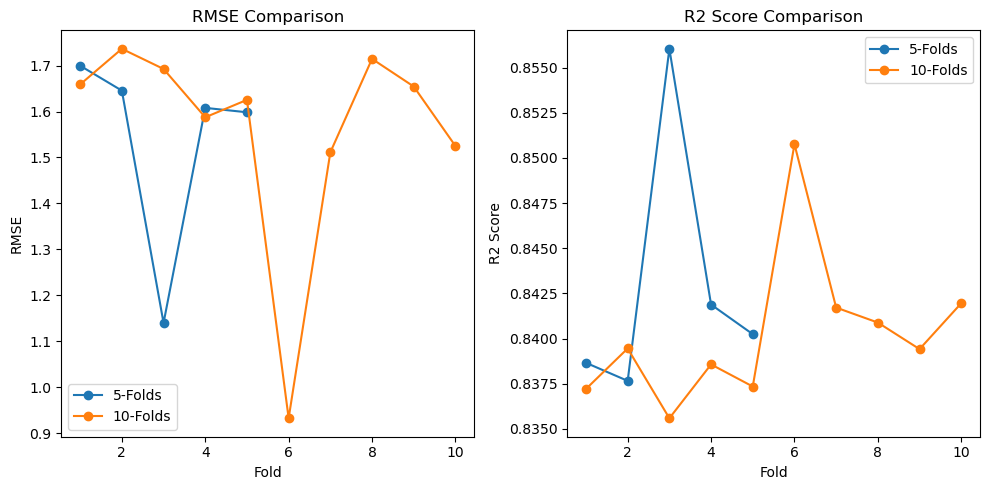

In [6]:
# Plotting RMSE
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 6), rmses_5, marker='o', label='5-Folds')
plt.plot(range(1, 11), rmses_10, marker='o', label='10-Folds')
plt.title('RMSE Comparison')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

# Plotting R2 Scores
plt.subplot(1, 2, 2)
plt.plot(range(1, 6), r2s_5, marker='o', label='5-Folds')
plt.plot(range(1, 11), r2s_10, marker='o', label='10-Folds')
plt.title('R2 Score Comparison')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
import matplotlib.pyplot as plt

def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    fig, ax = plt.subplots(figsize=(10, 5))
    
    for i, residual_value in enumerate(residuals):
        ax.plot([i, i], [0, residual_value], color='black', linestyle='--', linewidth=0.5)
        ax.plot(i, residual_value, marker='o', markersize=4, color='red')
        
    ax.axhline(y=0, color='black', linestyle='-')
    ax.set_xlabel('Observação')
    ax.set_ylabel('Resíduos')
    ax.set_title('Resíduos do Teste')
    plt.show()

# Durante ou após sua validação cruzada (dependendo de quando você quer ver os resíduos)

# Assumindo que 'predictions' é sua variável de previsões do último fold
plot_residuals(y_test, predictions)

NameError: name 'predictions' is not defined